# Performing Logistic Regression 

## Introduction

In this activity, I will practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a binomial logistic regression model 
* Evaluating a binomial logistic regression model using a confusion matrix

## Step 1: Imports

### Import packages

Import relevant Python packages. Use `train_test_split`, `LogisticRegression`, and various imports from `sklearn.metrics` to build, visualize, and evalute the model.

In [4]:
### YOUR CODE HERE ###

# Standard operational package imports.
import pandas as pd
# Important imports for preprocessing, modeling, and evaluation.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics

# Visualization package imports.
import seaborn as sns


### Load the dataset

The dataset **Invistico_Airline.csv** is loaded. The resulting pandas DataFrame is saved as a variable named `df_original`.

In [5]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
df_original = pd.read_csv("Invistico_Airline.csv")

### Output the first 10 rows

Output the first 10 rows of data.

In [6]:
### YOUR CODE HERE ##
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for a logistic regression model. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that logistic regression models expect numeric data. 

In [7]:
### YOUR CODE HERE ###
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

### Check the number of satisfied customers in the dataset

To predict customer satisfaction, check how many customers in the dataset are satisfied before modeling.

In [8]:
### YOUR CODE HERE ###
df_original['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

**Question:** How many satisfied and dissatisfied customers were there?

There are 71807 satisfied customers

**Question:** What percentage of customers were satisfied?

54.7% customers were satisfied. 

### Check for missing values

An assumption of logistic regression models is that there are no missing values. Check for missing values in the rows of the data.

In [9]:
### YOUR CODE HERE ###
df_original.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

**Question:** Should you remove rows where the `Arrival Delay in Minutes` column has missing values, even though the airline is more interested in the `inflight entertainment` column?

Yes it is important to remove the null values from the dataset otherwise the models would not be able to prodict the correct values. 

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [10]:
### YOUR CODE HERE ###
df_subset=df_original.dropna(axis=0).reset_index(drop = True)

### Prepare the data

If you want to create a plot (`sns.regplot`) of your model to visualize results later in the notebook, the independent variable `Inflight entertainment` cannot be "of type int" and the dependent variable `satisfaction` cannot be "of type object." 

Make the `Inflight entertainment` column "of type float." 

In [11]:
### YOUR CODE HERE ###
df_subset = df_subset.astype({"Inflight entertainment": float})

### Convert the categorical column `satisfaction` into numeric

Convert the categorical column `satisfaction` into numeric through one-hot encoding.

In [12]:
### YOUR CODE HERE ###
df_subset['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()


### Output the first 10 rows of `df_subset`

To examine what one-hot encoding did to the DataFrame, output the first 10 rows of `df_subset`.

In [13]:
### YOUR CODE HERE ###
df_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Create the training and testing data

Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.


In [14]:
### YOUR CODE HERE ###
X = df_subset[["Inflight entertainment"]]
y = df_subset["satisfaction"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=52)

**Question:** If you want to consider customer satisfaction with your model, should you train your model to use `inflight entertainment` as your sole independent variable? 

Other variables, like Departure Delay in Minutes seem like they can be potentially influential to customer satisfaction. This is why only using one independent variable might not be ideal.

## Step 3: Model building

### Fit a LogisticRegression model to the data

Build a logistic regression model and fit the model to the training data. 

In [15]:
### YOUR CODE HERE ###
clf = LogisticRegression().fit(X_train,y_train)

### Obtain parameter estimates
Make sure you output the two parameters from your model. 

In [16]:
### YOUR CODE HERE ###
clf.coef_

array([[0.99570117]])

In [17]:
### YOUR CODE HERE ###
clf.intercept_


array([-3.18754822])

### Create a plot of your model

Create a plot of your model to visualize results using the seaborn package.

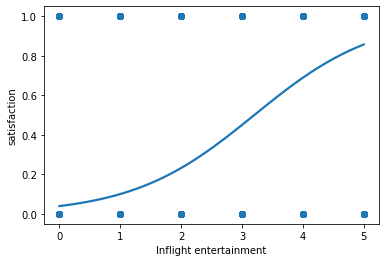

In [18]:
### YOUR CODE HERE ###
sns.regplot(x="Inflight entertainment", y="satisfaction", data=df_subset, logistic=True, ci=None)

**Question:** What can you tell from the graph?

The graph seems to indicate that the higher the inflight entertainment value, the higher the customer satisfaction, though this is currently not the most informative plot. The graph currently doesn't provide much insight into the data points, as Inflight entertainment is categorical.

## Step 4. Results and evaluation


### Predict the outcome for the test dataset

Now that you've completed your regression, review and analyze your results. First, input the holdout dataset into the `predict` function to get the predicted labels from the model. Save these predictions as a variable called `y_pred`.

In [19]:
### YOUR CODE HERE ###

# Save predictions.
y_pred = clf.predict(X_test)

### Print out `y_pred`

In order to examine the predictions, print out `y_pred`. 

In [20]:
### YOUR CODE HERE ###
print(y_pred)

[0. 1. 0. ... 0. 1. 1.]


### Use the `predict_proba` and `predict` functions on `X_test`

In [21]:
# Use predict_proba to output a probability.

### YOUR CODE HERE ###
clf.predict_proba(X_test)

array([[0.54994407, 0.45005593],
       [0.31104112, 0.68895888],
       [0.76783845, 0.23216155],
       ...,
       [0.54994407, 0.45005593],
       [0.14295535, 0.85704465],
       [0.31104112, 0.68895888]])

In [22]:
# Use predict to output 0's and 1's.

### YOUR CODE HERE ###
clf.predict(X_test)

array([0., 1., 0., ..., 0., 1., 1.])

### Analyze the results

Print out the model's accuracy, precision, recall, and F1 score.

In [23]:
### YOUR CODE HERE ###
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.803022
Precision: 0.817409
Recall: 0.825310
F1 Score: 0.821340


### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

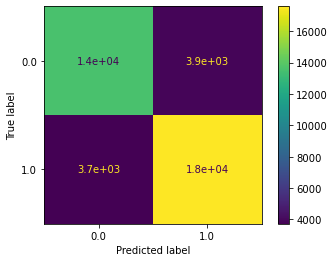

In [24]:
### YOUR CODE HERE ###
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()

**Question:** What stands out to you about the confusion matrix?

Two of the quadrants are under 4,000, which are relatively low numbers. Based on what we know from the data and interpreting the matrix, it's clear that these numbers relate to false positives and false negatives.

Additionally, the other two quadrants—the true positives and true negatives—are both high numbers above 13,000.

**Question:** Did you notice any difference in the number of false positives or false negatives that the model produced?

There isn't a large difference in the number of false positives and false negatives. 

**Question:** What do you think could be done to improve model performance?

Using more than a single independent variable in the model training process could improve model performance. This is because other variables, like Departure Delay in Minutes, seem like they could potentially influence customer satisfaction.

## Considerations

**What are some key takeaways that you learned from this lab?**
*   A lot of machine learning workflows are about cleaning, encoding, and scaling data.
*   The approach you use to plot or graph your data may depend on the type of variable you are evaluating. 
*   Training a logistic regression model on a single independent variable can produce a relatively good model (80.2 percent accuracy).

**What findings would you share with others?**
*   Logistic regression accurately predicted satisfaction 80.2 percent of the time.  
*   The confusion matrix is useful, as it displays a similar amount of true positives and true negatives. 

**What would you recommend to stakeholders?**
*  Customers who rated in-flight entertainment highly were more likely to be satisfied. Improving in-flight entertainment should lead to better customer satisfaction. 
*  The model is 80.2 percent accurate. This is an improvement over the dataset's customer satisfaction rate of 54.7 percent. 
*  The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results. Building this model could not only be useful in predicting whether or not a customer would be satisfied but also lead to a better understanding of what independent variables lead to happier customers. 
